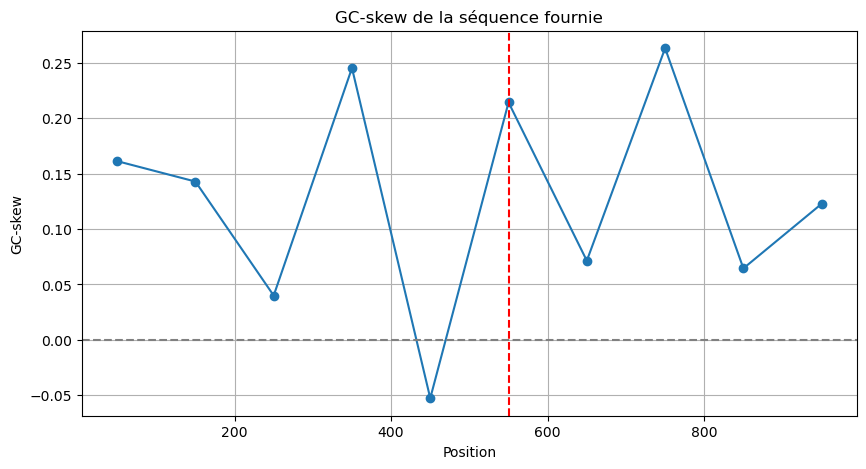

OriC détecté à la position(s) : [550]


In [24]:
import matplotlib.pyplot as plt
#GC-skew 

def GC_skew(seq):
    """ Fonction qui calcule le GC-skew d'une séquence"""
    C = seq.count('C')
    G = seq.count('G')
    
    somme = G+C

    if somme == 0: 
        return 0 #Pour éviter de faire une division par 0
     
    return (G-C) / somme 

def GCskewfenetre (seq, fenetre=100):
    """Fonction qui calcule l'asymétrie GC dans une fenêtre"""
    sequences = [ ]
    position = [ ]
    for i in range (0, len(seq) - fenetre + 1 , fenetre): 
        seq_fenetre = seq[i:i+fenetre]
        val = GC_skew(seq_fenetre)
        sequences.append(val)
        position.append(i + fenetre//2) #Pour placer chaque valeur de GC_skew au milieu de sa fenêtre (pour mieux visualiser sur le graphe)
    return position, sequences

# Fonction pour détecter l'OriC basé sur le GC-skew
def detect_oriC(positions, sequences):
    """Détecte l'oriC en cherchant un changement de signe dans le GC-skew."""
    oriC_positions = []
    for i in range(1, len(sequences)):
        if sequences[i-1] < 0 and sequences[i] > 0:  # Passage de négatif à positif
            oriC_positions.append(positions[i])  # Enregistre la position du changement
    return oriC_positions

seq = """CAGATTGTCGATCAGATAATTTTCCATAGGATTTTCTTATGCGGATTGATGATTCATTCTATTTTAGCCT
TCTTTTTTAATGAATCAAAAGTGAGTTAGGCTTTTTATTGAATGATTATTGCATGTGTGTCGGTTTTTGT
TGCTTAATCATAAGCAACAGGACGCAGGAGTATAAAAAATGAAAACCGCTTACATTGCCAAACAACGTCA
AATTAGCTTCGTGAAATCTCACTTTTCTCGTCAACTGGAAGAACGTCTGGGGCTGATCGAAGTCCAGGCG
CCGATTCTTAGCCGTGTGGGGGATGGCACGCAGGATAACTTGTCGGGCTGTGAAAAAGCGGTGCAGGTAA
AAGTGAAAGCTCTGCCTGATGCCCAGTTCGAAGTGGTTCATTCACTGGCGAAGTGGAAACGTCAGACCTT
AGGGCAACACGACTTCAGCGCGGGCGAAGGGCTGTACACGCACATGAAAGCCCTTCGCCCCGATGAAGAC
CGTCTTTCTCCGTTGCACTCGGTCTATGTTGACCAGTGGGACTGGGAACGCGTAATGGGCGACGGTGAGC
GTCAATTCTCGACTCTGAAAAGCACGGTAGAGGCGATCTGGGCGGGAATTAAAGCAACCGAAGCTGCGGT
TAGCGAAGAGTTTGGCCTGGCACCGTTCCTGCCGGATCAGATCCACTTCGTACACAGCCAGGAGTTACTG
TCTCGTTATCCGGATCTTGATGCCAAAGGGCGTGAGCGGGCGATAGCGAAAGATCTTGGCGCGGTATTCC
TTGTCGGGATTGGCGGCAAGCTGAGCGATGGTCATCGCCACGACGTGCGCGCACCGGATTATGATGACTG
GAGCACCCCGTCAGAGCTGGGCCATGCGGGTCTGAACGGCGATATTCTGGTGTGGAACCCGGTACTGGAA
GATGCGTTTGAGCTTTCCTCCATGGGGATCCGTGTAGATGCCGACACGCTGAAGCATCAACTGGCGCTGA
CCGGTGACGAAGATCGCCTGG""".replace("\n", "")


# Calcul du GC-skew avec une fenêtre de 100 bases
position, sequences = GCskewfenetre(seq, fenetre=100)

# Détection de l'OriC basé sur un changement de signe dans le GC-skew
oriC_positions = detect_oriC(position, sequences)

#Partie affichage du graphe

plt.figure(figsize=(10, 5))
plt.plot(position, sequences, marker='o')
plt.title("GC-skew de la séquence fournie")
plt.xlabel("Position")
plt.ylabel("GC-skew")
plt.axhline(0, color='gray', linestyle='--') #tracer une ligne horizontale à y = 0 pour visualiser où le GC-skew change de signe (souvent un indice de l'Ori ).
plt.grid(True) #Pour faire apparaitre une grille de fond (lignes horizontales et verticales)

# Marquer les positions de l'OriC détectées sur le graphique
for i in oriC_positions:
    plt.axvline(x=i, color='red', linestyle='--')
    
plt.show()


# Affichage des positions des OriC détectées
if oriC_positions:
    print(f"OriC détecté à la position(s) : {oriC_positions}")
else:
    print("Aucun OriC détecté.")
